### cctv와 인구분석 2
- 전처리되어져서 저장된 데이터 불러오기
- cctv와 인구와의 관계를 scatter plot으로 표현하고
- 관계 데이터를 기반으로 한 대표직선(회귀직선)을 수동으로 표현
- 직선이 의미하는 인구대비 적정 cctv 대수를 자치구별로 파악
    - 적정 cctv 대수와 절대값으로 오차가 큰 10개 자치구를 scatter에 표현

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [8]:
# 전처리된 저장 데이터 load
cctv_res = pd.read_csv('./data/data_result.csv')
cctv_res.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,고령자비율,외국인비율,cctv비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,11.072217,0.867660,0.567572
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,12.051638,0.929765,0.222843
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,16.600342,1.061806,0.251672
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,12.015794,1.080540,0.150885
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,12.955291,3.484582,0.401321


In [9]:
# 구별 컬럼 index로 설정
cctv_res.set_index("구별", inplace=True)

In [10]:
cctv_res.head(2)

,소계,최근증가율,인구수,한국인,외국인,고령자,고령자비율,외국인비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,11.072217,0.867660,0.567572
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,12.051638,0.929765,0.222843


###  cctv와 인구수 관계 표현

<Figure size 800x800 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, '수')

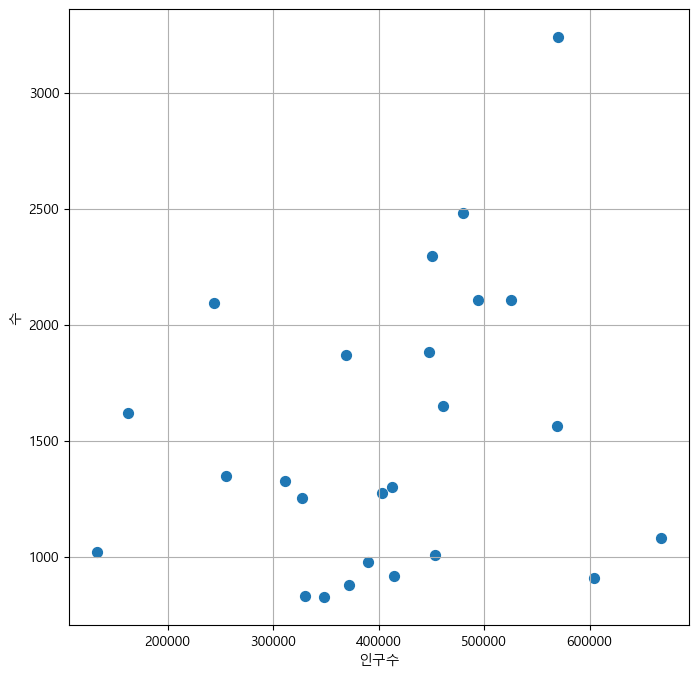

In [11]:
# 산점도
plt.figure(figsize=(8,8))
plt.scatter(cctv_res["인구수"], cctv_res["소계"],s=50)
plt.xlabel("인구수")
plt.ylabel("수")
plt.grid()
plt.show() 

### 구별 인구수와 구별 cctv 수의 관계를 대표하는 직선 그리기\
- cctv 수는 구별 인구수가 결정한다
- x와 y가 data가 주어졌을 때 x와 y의 관계를 이용해서 직선방정식을 생성
    - x와 y의 관계에 대한 기울기와 절편
        - np.polyfit(data1, data2,차수) 사용
    - 방정식 생성 함수
        - np.poly1d([기울기, 절편])    

In [12]:
poly_fit = np.polyfit(cctv_res.인구수,cctv_res.소계, 1)
poly_fit

array([1.15151285e-03, 1.04561312e+03])

- 적정cctv수 = 0.00115151285X인구수 + 1045.61312

In [15]:
# 1차 직선 방정식을 생성
poly_1d = np.poly1d(poly_fit)
poly_1d

poly1d([1.15151285e-03, 1.04561312e+03])

In [12]:
cctv_res.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217,0.567572


In [16]:
print(poly_1d(570500))

1702.5511985734365


- 직선 data 생성

In [17]:
# 임의의 인구수  50개 생성
xs = np.linspace(cctv_res.인구수.min(), cctv_res.인구수.max())
xs

array([133240.        , 144142.91836735, 155045.83673469, 165948.75510204,
       176851.67346939, 187754.59183673, 198657.51020408, 209560.42857143,
       220463.34693878, 231366.26530612, 242269.18367347, 253172.10204082,
       264075.02040816, 274977.93877551, 285880.85714286, 296783.7755102 ,
       307686.69387755, 318589.6122449 , 329492.53061224, 340395.44897959,
       351298.36734694, 362201.28571429, 373104.20408163, 384007.12244898,
       394910.04081633, 405812.95918367, 416715.87755102, 427618.79591837,
       438521.71428571, 449424.63265306, 460327.55102041, 471230.46938776,
       482133.3877551 , 493036.30612245, 503939.2244898 , 514842.14285714,
       525745.06122449, 536647.97959184, 547550.89795918, 558453.81632653,
       569356.73469388, 580259.65306122, 591162.57142857, 602065.48979592,
       612968.40816327, 623871.32653061, 634774.24489796, 645677.16326531,
       656580.08163265, 667483.        ])

In [18]:
# 1차 방정식을 이용하여
# xs(임의의 인구수)에 대응하는 ys(적정 cctv 대수) 계산
ys = poly_1d(xs)
ys

array([1199.04069124, 1211.59554181, 1224.15039238, 1236.70524294,
       1249.26009351, 1261.81494407, 1274.36979464, 1286.92464521,
       1299.47949577, 1312.03434634, 1324.5891969 , 1337.14404747,
       1349.69889804, 1362.2537486 , 1374.80859917, 1387.36344973,
       1399.9183003 , 1412.47315087, 1425.02800143, 1437.582852  ,
       1450.13770256, 1462.69255313, 1475.2474037 , 1487.80225426,
       1500.35710483, 1512.9119554 , 1525.46680596, 1538.02165653,
       1550.57650709, 1563.13135766, 1575.68620823, 1588.24105879,
       1600.79590936, 1613.35075992, 1625.90561049, 1638.46046106,
       1651.01531162, 1663.57016219, 1676.12501275, 1688.67986332,
       1701.23471389, 1713.78956445, 1726.34441502, 1738.89926558,
       1751.45411615, 1764.00896672, 1776.56381728, 1789.11866785,
       1801.67351841, 1814.22836898])

<Figure size 800x800 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, '수')

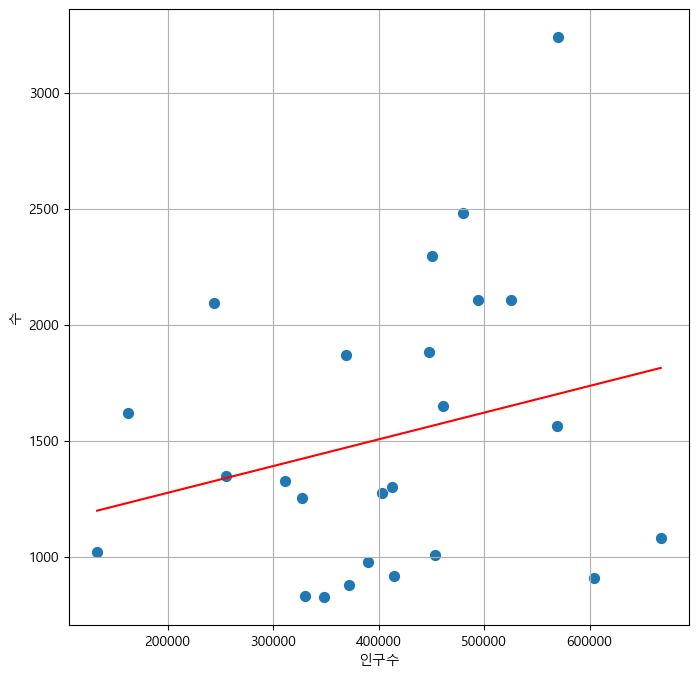

In [22]:
# 직선을 포함한 그래프 생성
plt.figure(figsize=(8,8))
plt.scatter(cctv_res["인구수"], cctv_res["소계"],s=50, label="cctv vs pop")
plt.plot(xs, ys, color="red", label = f'{poly_fit[1]:.2f} + {poly_fit[0]:.4f}x')
plt.xlabel("인구수")
plt.ylabel("수")
plt.grid()
plt.show() 

### 그래프 직선의 의미
- 인구수 400000이면 적정 cctv 대수는 1500로 추정한다
- 직선 위에 표현된 자치구는 적정 cctv 대수 이상을 보유
- 직선 아래에 표현된 자치구는 적정 cctv 대수를 보유하지 못한 구

In [23]:
# 각 자치구별 적정 cctv 대수 추정
save_cctv = poly_1d(cctv_res.인구수)
save_cctv

array([1702.55119857, 1567.51674158, 1425.83344942, 1740.86433401,
       1650.75039317, 1474.16474662, 1561.34578424, 1339.34331951,
       1701.26611024, 1447.08346749, 1471.09251034, 1520.63519906,
       1494.29894874, 1422.34551701, 1564.15086953, 1404.014584  ,
       1576.7599352 , 1814.22836898, 1598.31395267, 1509.65552407,
       1326.81601125, 1614.90725279, 1233.10244125, 1199.04069124,
       1522.91864903])

In [25]:
cctv_res["적정cctv수"] = save_cctv
cctv_res.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,고령자비율,외국인비율,cctv비율,적정cctv수
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,11.072217,0.867660,0.567572,1702.551199
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,12.051638,0.929765,0.222843,1567.516742
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,16.600342,1.061806,0.251672,1425.833449
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,12.015794,1.080540,0.150885,1740.864334
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,12.955291,3.484582,0.401321,1650.750393


In [27]:
(cctv_res["적정cctv수"] - cctv_res["소계"]).abs().sort_values(ascending=False).head(10)

구별
강남구    1535.448801
양천구     883.686047
강서구     829.864334
용산구     769.183989
송파구     733.228369
서초구     732.849130
도봉구     622.083467
중랑구     606.918649
광진구     596.164747
강북구     594.833449
dtype: float64

In [28]:
cctv_res["오차"] = np.abs(cctv_res["적정cctv수"]-cctv_res["소계"])
cctv_res.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,고령자비율,외국인비율,cctv비율,적정cctv수,오차
구별,,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,11.072217,0.867660,0.567572,1702.551199,1535.448801
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,12.051638,0.929765,0.222843,1567.516742,557.516742
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,16.600342,1.061806,0.251672,1425.833449,594.833449
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,12.015794,1.080540,0.150885,1740.864334,829.864334
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,12.955291,3.484582,0.401321,1650.750393,458.249607


In [30]:
# 오차열 기준으로 내림차준 정렬한 df 생성
df_sort = cctv_res.sort_values(by="오차", ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,고령자비율,외국인비율,cctv비율,적정cctv수,오차
구별,,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,11.072217,0.867660,0.567572,1702.551199,1535.448801
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,11.036964,0.839413,0.517107,1598.313953,883.686047
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,12.015794,1.080540,0.150885,1740.864334,829.864334
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,14.836427,6.038828,0.858302,1326.816011,769.183989
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,10.862599,1.033584,0.161952,1814.228369,733.228369


### 오차가 큰 상위 10개 도시 표시
- 그래프에 글자(text)출력 함수
    - plt.text(x좌표, y좌표, 표시글자, fontsize)
    - scatter보다 약간 오른쪽 아래에 출력되도록 좌표를 변경
        - 인구수*1.02,소계X0.98

'양천구'

<Figure size 800x800 with 0 Axes>

Text(581910.0, 3173.24, '강남구')

Text(489577.56, 2432.36, '양천구')

Text(615847.4400000001, 892.78, '강서구')

Text(249087.06, 2054.08, '용산구')

Text(680832.66, 1059.3799999999999, '송파구')

Text(459316.2, 2251.06, '서초구')

Text(355618.92, 808.5, '도봉구')

Text(422793.06, 897.68, '중랑구')

Text(379607.28, 860.4399999999999, '광진구')

Text(336795.84, 814.38, '강북구')

Text(0.5, 0, '인구수')

Text(0, 0.5, '구별 cctv수')

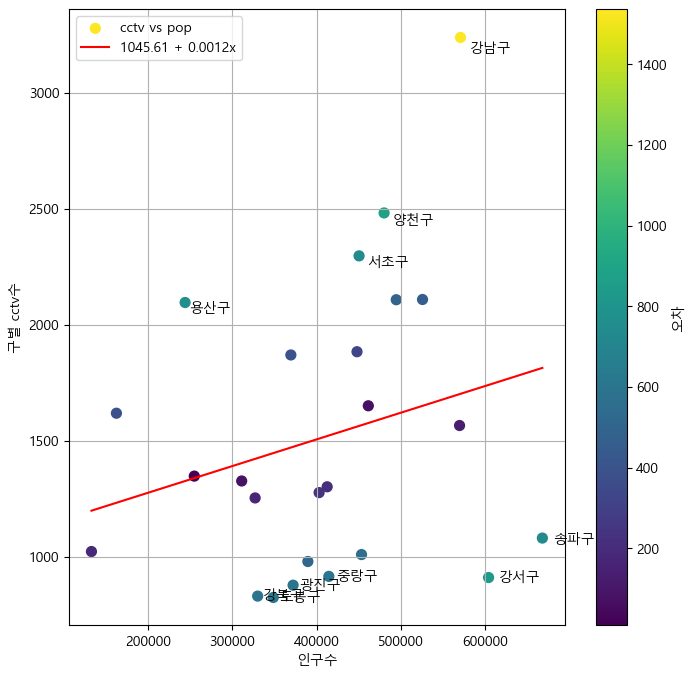

In [41]:
# 직선을 포함한 그래프 생성 - 오차가 큰 자치구 표시
# c는 해당값을 기준으로 scatter 색상 결정하겠다
plt.figure(figsize=(8,8))
plt.scatter(cctv_res["인구수"], cctv_res["소계"],s=50, label="cctv vs pop", c = cctv_res["오차"])
plt.plot(xs, ys, color="red", label = f'{poly_fit[1]:.2f} + {poly_fit[0]:.4f}x')
# 오차가 큰 10개 자치구의 scatter에 자치구명 표시
# plt.text(x좌표, y좌표, text내용, fontsize=, ...)
for n in range(10):
    plt.text(df_sort["인구수"][n]*1.02, df_sort["소계"][n]*0.98, df_sort.index[n], fontsize=10)
plt.xlabel("인구수")
plt.ylabel("구별 cctv수")
plt.colorbar(label="오차")
plt.legend(loc="upper left")
plt.grid()
plt.show() 